In [1]:
# Import Library
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import math

In [2]:
# Import Library Tambahan
from plotly.subplots import make_subplots
from plotly import data
import plotly.graph_objects as go
from matplotlib.patches import ConnectionPatch

In [3]:
dataset = pd.read_excel("../Dataset/Adidas US Sales Datasets.xlsx", sheet_name='Sheet1')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   int64         
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 980.0+ KB


In [4]:
dataset

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


In [5]:
# dataset.Retailer.unique()
dataset["Retailer"].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [6]:
dataset["Region"].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [7]:
dataset["State"].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [8]:
dataset["City"].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [9]:
dataset["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [10]:
dataset["Sales Method"].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [11]:
df = dataset.groupby(by=["Retailer"])["Total Sales"].aggregate("sum").sort_values(ascending=True).reset_index()
df

,Retailer,Total Sales
0,Walmart,74558410
1,Amazon,77698912
2,Kohl's,102114753
3,Sports Direct,182470997
4,Foot Locker,220094720
5,West Gear,242964333


In [12]:
fig = px.bar(df, x="Retailer", y="Total Sales", text="Total Sales", text_auto=".2s", color="Total Sales")
fig.show()

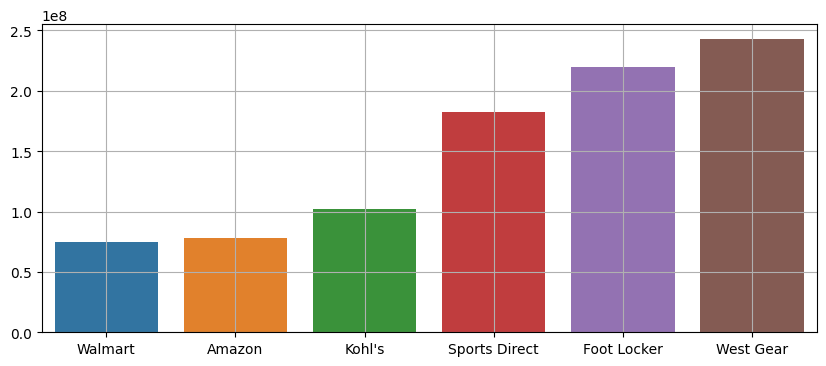

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=df, x="Retailer", y="Total Sales", hue="Retailer")

# Set Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.figure(facecolor='lightblue')
plt.tight_layout()
plt.show()

In [14]:
total_sales = dataset["Total Sales"].aggregate("sum")
print(f"Total Sales : "+"{:,.2f}".format(total_sales))

Total Sales : 899,902,125.00


In [15]:

print("Total Sales : "+str(np.round(total_sales,-6) // 1_000_000) + " M")

Total Sales : 900 M


In [16]:
total_profit = dataset["Operating Profit"].aggregate("sum")
print(f"Total Profit : "+"{:,.2f}".format(total_profit))

Total Profit : 332,135,122.00


In [17]:
print("Total Profit : "+str(np.round(total_profit,6) // 1_000_000) + " M")

Total Profit : 332 M


In [18]:
df = dataset.groupby(by=["Sales Method"])["Operating Profit"].aggregate("sum").reset_index().sort_values(by=["Operating Profit"], ascending=False)

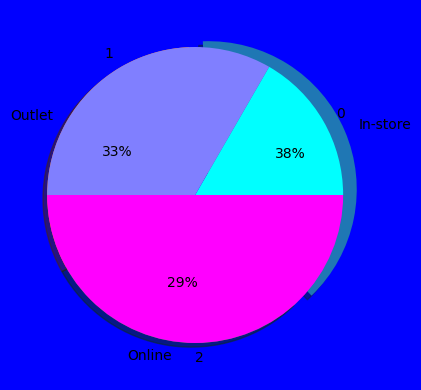

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
# sns.pieplot(data=df, x="Retailer", y="Total Sales", hue="Retailer")
ax.pie(x=df["Operating Profit"], labels=df["Sales Method"], autopct='%.0f%%', startangle=314, explode=[0.1, 0.0, 0.0], shadow=True)

# Set Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
s = pd.Series([1,2,3])
s.plot.pie(cmap='cool')
fig.set_facecolor('blue')
plt.tight_layout()
plt.show()

In [20]:
fig = px.pie(df, values='Operating Profit', names='Sales Method', hole=0.8)
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

In [21]:
df = dataset.groupby(by=["Product"])[["Total Sales", "Operating Profit"]].aggregate("sum").reset_index().sort_values("Product")
df

,Product,Total Sales,Operating Profit
0,Men's Apparel,123728632,44763099
1,Men's Athletic Footwear,153673680,51846964
2,Men's Street Footwear,208826244,82802323
3,Women's Apparel,179038860,68650996
4,Women's Athletic Footwear,106631896,38975843
5,Women's Street Footwear,128002813,45095897


In [22]:
fig = px.bar(df, x="Product", y=["Operating Profit", "Total Sales"], title="Long-Form Input", text_auto=True)
fig.show()

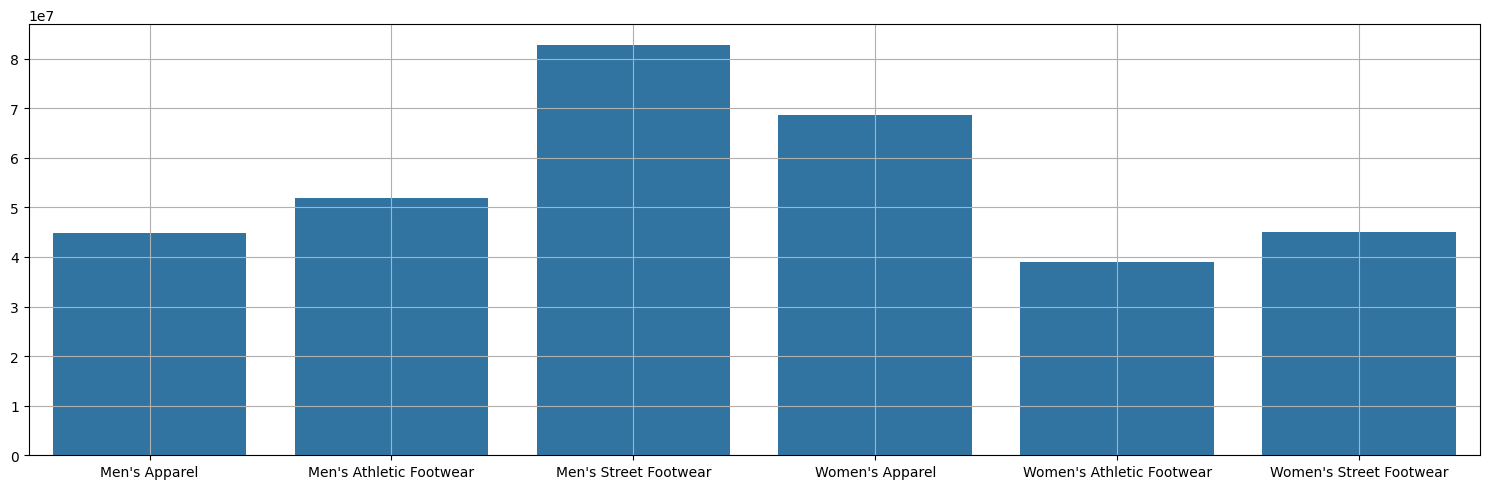

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df, x="Product", y="Operating Profit")

# Set Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [24]:
df = dataset.groupby(by=["Product"])[["Total Sales", "Operating Profit"]].aggregate("sum").reset_index().sort_values("Product")


fig = go.Figure()
fig.add_trace(go.Bar(x=df["Product"], y=df["Total Sales"],
                marker_color='crimson',
                name='higher (Sales)'))
fig.add_trace(go.Bar(x=df["Product"], y=df["Operating Profit"],
                marker_color='lightslategrey',
                name='lower (Profit)'
                ))

fig.update_layout(
    barmode='group',
    title="Total Sales dan Operating Profit per Product",
    xaxis_title="Product",
    yaxis_title="Jumlah (dalam unit)",
    showlegend=True,
    template="plotly_white"
)


fig.show()

In [25]:
df = pd.melt(df, id_vars=["Product"], value_vars=["Total Sales", "Operating Profit"], var_name="Metric", value_name="Value")

In [26]:
df

,Product,Metric,Value
0,Men's Apparel,Total Sales,123728632
1,Men's Athletic Footwear,Total Sales,153673680
2,Men's Street Footwear,Total Sales,208826244
3,Women's Apparel,Total Sales,179038860
4,Women's Athletic Footwear,Total Sales,106631896
5,Women's Street Footwear,Total Sales,128002813
6,Men's Apparel,Operating Profit,44763099
7,Men's Athletic Footwear,Operating Profit,51846964
8,Men's Street Footwear,Operating Profit,82802323
9,Women's Apparel,Operating Profit,68650996


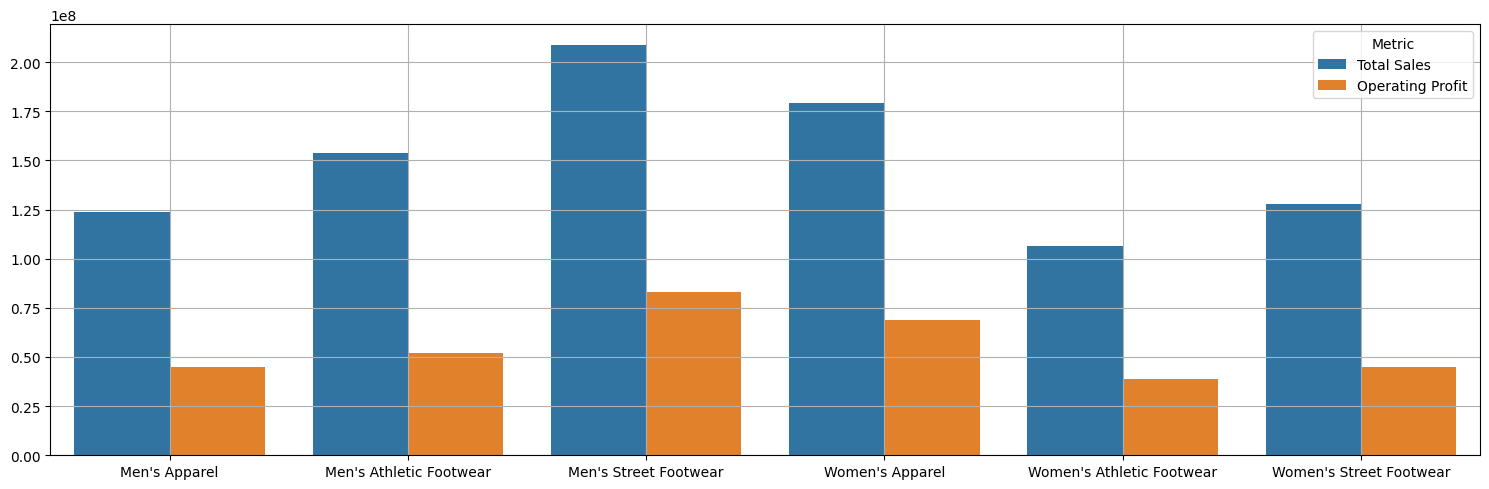

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(data=df, x="Product", y="Value", hue="Metric")

# Set Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [28]:
df = dataset.groupby(by=["Invoice Date"])[["Total Sales", "Operating Profit"]].aggregate("sum")
df = df.reset_index()
df

,Invoice Date,Total Sales,Operating Profit
0,2020-01-01,845141,382132
1,2020-01-02,689410,225947
2,2020-01-03,632573,202279
3,2020-01-04,615080,228235
4,2020-01-05,707829,222392
...,...,...,...
719,2021-12-27,602353,282960
720,2021-12-28,301010,106359
721,2021-12-29,211109,85281
722,2021-12-30,167903,62110


In [29]:
fig = px.line(df, x="Invoice Date", y="Total Sales", title='', markers=True, text="Total Sales")

fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.show()

In [30]:
df = df.set_index("Invoice Date")
df = df.resample("4ME").sum()
df = df.reset_index()
df

,Invoice Date,Total Sales,Operating Profit
0,2020-01-31,16253746,5830009
1,2020-05-31,74183585,26241520
2,2020-09-30,64158248,21669038
3,2021-01-31,82710492,28947104
4,2021-05-31,196573342,73096618
5,2021-09-30,275897478,104561725
6,2022-01-31,190125234,71789108


In [31]:
fig = px.line(df, x="Invoice Date", y="Total Sales")

In [32]:
fig = px.line(df, x="Invoice Date", y="Total Sales", title='', markers=True, text="Total Sales")

fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.show()

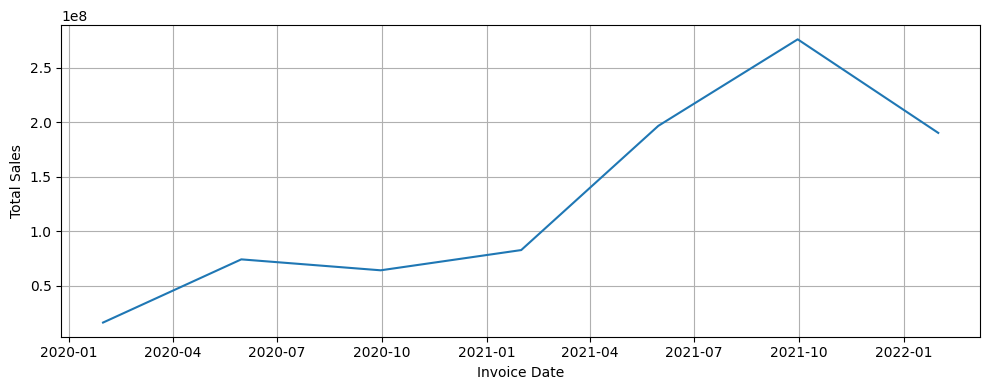

In [33]:
fig, ax = plt.subplots(figsize=(10,4))

sns.lineplot(data = df, x="Invoice Date", y="Total Sales")

ax.grid(True)

plt.tight_layout()
plt.show()

In [34]:
df = dataset.groupby(by=["Invoice Date"])[["Total Sales", "Operating Margin"]].aggregate("mean")
df = df.reset_index()
df


,Invoice Date,Total Sales,Operating Margin
0,2020-01-01,140856.833333,44.666667
1,2020-01-02,114901.666667,40.000000
2,2020-01-03,105428.833333,35.166667
3,2020-01-04,102513.333333,43.166667
4,2020-01-05,117971.500000,38.833333
...,...,...,...
719,2021-12-27,120470.600000,53.600000
720,2021-12-28,60202.000000,40.600000
721,2021-12-29,42221.800000,46.400000
722,2021-12-30,33580.600000,42.600000


In [35]:
x = np.array(df["Invoice Date"])
y = np.array(df["Total Sales"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Invoice Date"], y=df["Total Sales"] + 1, name="vh", line_shape='vh'))

fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()